For the below dataset, after the first split on Age, on which variable should we do the second split?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree

In [2]:
# Load data
df = pd.read_csv('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Tree-Based-Models-main/q5_data.csv')
df

,age,income,student,credit_rating,buys_laptop
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31..40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [3]:
# Lets create dummy variables
age_dummy = pd.get_dummies(df['age'], prefix='age', drop_first=True)
inc_dummy = pd.get_dummies(df['income'], prefix='inc', drop_first=True)
std_dummy = pd.get_dummies(df['student'], prefix='std', drop_first=True)
cr_dummy = pd.get_dummies(df['credit_rating'], prefix='cr', drop_first=True)

# Merge with the main data frame
df = pd.concat([age_dummy,inc_dummy,std_dummy,cr_dummy,df], axis=1)

# CHeck data
df.head()

,age_<=30,age_>40,inc_low,inc_medium,std_yes,cr_fair,age,income,student,credit_rating,buys_laptop
0,1,0,0,0,0,1,<=30,high,no,fair,no
1,1,0,0,0,0,0,<=30,high,no,excellent,no
2,0,0,0,0,0,1,31..40,high,no,fair,yes
3,0,1,0,1,0,1,>40,medium,no,fair,yes
4,0,1,1,0,1,1,>40,low,yes,fair,yes


In [4]:
# Drop original variables from which dummies are created
df.drop(['age','income','student','credit_rating'], axis=1, inplace=True)

# Check columns
df.columns

Index(['age_<=30', 'age_>40', 'inc_low', 'inc_medium', 'std_yes', 'cr_fair',
       'buys_laptop'],
      dtype='object')

In [5]:
# Map target yes:1 and no:0
df['buys_laptop'] = df['buys_laptop'].map({'yes':1, 'no':0})

# Check data
df.head()

,age_<=30,age_>40,inc_low,inc_medium,std_yes,cr_fair,buys_laptop
0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,1
3,0,1,0,1,0,1,1
4,0,1,1,0,1,1,1


In [6]:
# Prepare X and y
X = df.drop('buys_laptop', axis=1)
y = df['buys_laptop']

In [7]:
# Check X
X.head()

,age_<=30,age_>40,inc_low,inc_medium,std_yes,cr_fair
0,1,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,0,0,1
3,0,1,0,1,0,1
4,0,1,1,0,1,1


In [8]:
# Check y
y[:4]

0    0
1    0
2    1
3    1
Name: buys_laptop, dtype: int64

In [9]:
# ID3
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X,y)

[Ellipsis]

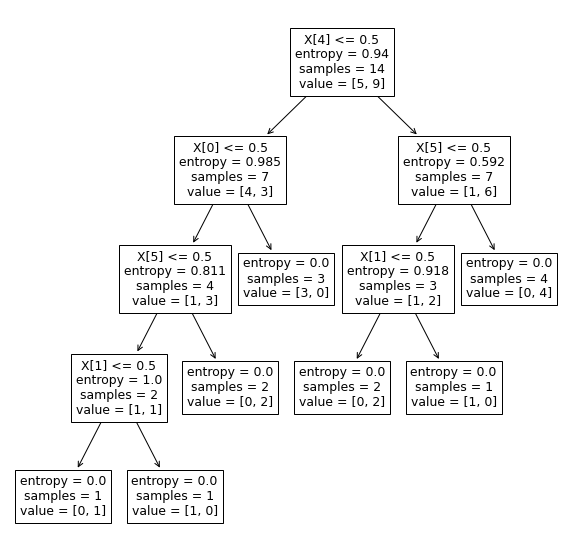

In [10]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
[...]

As can be seen, X[0] indicate Age <= 30 with split criteria X[0] <= 0.5.

If the condition is true, it looks for fair credit rating i.e. X[5] <= 0.5.

If the condition is false, it would trminate to a leaf node.